# Bernstein-Vazirani Algorithm

In this section, we first introduce the Bernstein-Vazirani problem, its classical solution, and the quantum algorithm to solve it. We then implement the quantum algorithm using Qiskit and run it on both a simulator and a device.

## 1. The Bernstein-Vazirani Algorithm<a id='algorithm'></a>

The Bernstein-Vazirani algorithm, first introduced in Reference [1], can be seen as an extension of the Deutsch-Jozsa algorithm we covered in the last section. It showed that there can be advantages in using a quantum computer as a computational tool for more complex problems than the Deutsch-Jozsa problem.

### 1.1 The Bernstein-Vazirani Problem <a id='bvproblem'> </a>

We are again given a black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:
$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

Instead of the function being balanced or constant as in the Deutsch-Jozsa problem, now the function is guaranteed to return the bitwise product of the input with some string, $s$. In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$. As a classical reversible circuit, the Bernstein-Vazirani oracle looks like this:
    
![classical reversible circuit](images/bv2.png)



### 1.2 The Classical Solution <a id='classical-solution'> </a>

Classically, the oracle returns:
$$f_s(x) = s \cdot x \mod 2$$ 
given an input $x$. Thus, the hidden bit string $s$ can be revealed by querying the oracle with the sequence of inputs:

|Input(x)|
|:-----:|
|100...0|
|010...0|
|001...0|
|000...1|

Where each query reveals a different bit of $s$ (the bit $s_i$). For example, with `x = 1000...0` one can obtain the least significant bit of $s$, with `x = 0100...0` we can find the next least significant, and so on. This means we would need to call the function $f_s(x)$, $n$ times. 

### 1.3 The Quantum Solution <a id='quantum-solution'> </a>

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$. The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple: 

1. Initialize the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

<img src="images/bv1.png">

To explain the algorithm, let’s look more closely at what happens when we apply a H-gate to each qubit. If we have an $n$-qubit state, $|a\rangle$, and apply the H-gates, we will see the transformation:

$$
|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle.
$$



<details>
    <summary>Explain Equation (Click to Expand)</summary>

We remember the Hadamard performs the following transformations on one qubit:

$$ H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$
$$ H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) $$

Using summation notation, we could rewrite it like this:

$$ H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in \{0,1\}} (-1)^{a\cdot x}|x\rangle. $$

For two qubits, applying a Hadamard to each performs the following transformations:

$$ H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$
$$ H^{\otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle) $$
$$ H^{\otimes 2}|10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$
$$ H^{\otimes 2}|11\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) $$

We can express this using the summation below:

$$ H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in \{0,1\}^2} (-1)^{a\cdot x}|x\rangle $$

You will hopefully now see how we arrive at the equation above.
</details>


In particular, when we start with a quantum register $|00\dots 0\rangle$ and apply $n$ Hadamard gates to it, we have the familiar quantum superposition:

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle
$$

In this case, the phase term $(-1)^{a\cdot x}$ disappears, since $a=0$, and thus $(-1)^{a\cdot x} = 1$. 

The classical oracle $f_s$ returns $1$ for any input $x$ such that $s \cdot x\mod 2 = 1$, and returns $0$ otherwise. If we use the same phase kickback trick from the Deutsch-Jozsa algorithm and act on a qubit in the state $|{-}\rangle$, we get the following transformation:

$$
|x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle 
$$

The algorithm to reveal the hidden bit string follows naturally by querying the quantum oracle $f_s$ with the quantum superposition obtained from the Hadamard transformation of $|00\dots 0\rangle$. Namely,

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle
$$

Because the inverse of the $n$ Hadamard gates is again the $n$ Hadamard gates, we can obtain $a$ by

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle
$$

## 2. Example  <a id='example'></a>

Let's go through a specific example for $n=2$ qubits and a secret string $s=11$. Note that we are following the formulation in Reference [2] that generates a circuit for the Bernstein-Vazirani quantum oracle using only one register. 

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>

You can change the number of input qubits and the value of the secret string through the first two positional arguments.

## 3. Qiskit Implementation  <a id='implementation'></a>

We'll now walk through the Bernstein-Vazirani algorithm implementation in Qiskit for a three bit function with $s=011$.

In [2]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

We first set the number of qubits used in the experiment, and the hidden bit string $s$ to be found by the algorithm. The hidden bit string $s$ determines the circuit for the quantum oracle. 

In [3]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

We then use Qiskit to program the Bernstein-Vazirani algorithm.

In [9]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.id(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░ ┌───┐      ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░─┤ I ├──────░─┤ H ├┤M├──────
     ├───┤      ░ └───┘      ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───■────────░─┤ H ├─╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────■───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║  ║ 
c: 3/════════════════════════════════╩══╩══╩═
                                     0  1  2

### 3a. Experiment with Simulators  <a id='simulation'></a>

We can run the above circuit on the simulator. 

Executing Quantum Circuit With...
4 Qubits And ...
11 Gates
Time Taken 0:00:00.064000


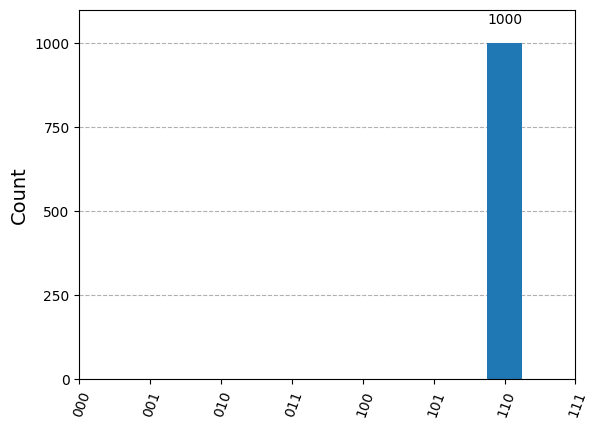

In [10]:
import sys
sys.path.append('../../../')
from AutomatskiKomencoQiskit import *

# Run the Circuit using Automatski' Quantum Simulators and Quantum Computers
# No need for transpiling with any transpiler
backend = AutomatskiKomencoQiskit(host="103.212.120.18", port=80)

#bv_circuit = bv_circuit.decompose().decompose()

# Run the circuit and get results
result_sim = backend.run(bv_circuit, repetitions=1000, topK=20)

answer = result_sim.get_counts(None)
plot_histogram(answer)

We can see that the result of the measurement is the hidden string `011`. 

2. The above [implementation](#implementation) of Bernstein-Vazirani is for a secret bit string $s = 011$. Modify the implementation for a secret string $s = 1011$. Are the results what you expect? Explain.
3. The above [implementation](#implementation) of Bernstein-Vazirani is for a secret bit string $s = 011$. Modify the implementation for a secret string $s = 11101101$. Are the results what you expect? Explain.

## 5. References <a id='references'></a>
1. Ethan Bernstein and Umesh Vazirani (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473, [doi:10.1137/S0097539796300921](https://doi.org/10.1137/S0097539796300921).
2. Jiangfeng Du, Mingjun Shi, Jihui Wu, Xianyi Zhou, Yangmei Fan, BangJiao Ye, Rongdian Han (2001) "Implementation of a quantum algorithm to solve the Bernstein-Vazirani parity problem without entanglement on an ensemble quantum computer", Phys. Rev. A 64, 042306, [10.1103/PhysRevA.64.042306](https://doi.org/10.1103/PhysRevA.64.042306), [arXiv:quant-ph/0012114](https://arxiv.org/abs/quant-ph/0012114). 

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table

ModuleNotFoundError: No module named 'qiskit.tools'